In [4]:
#Loading the required libraries

import pandas as pd
import numpy as np

#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

from sklearn import tree
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('BackOrders_Development.csv')

In [6]:
data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1682848,11,12.0,0,0,0,0,7,23,47,...,0,0.93,0.95,0,Yes,No,No,Yes,No,No
1,1952807,7,4.0,0,0,0,0,0,0,0,...,0,0.24,0.14,0,Yes,No,No,Yes,No,No
2,1990960,1,8.0,0,8,8,8,1,2,7,...,0,0.00,0.00,0,No,No,No,Yes,No,Yes
3,3250836,36,12.0,1,5,30,35,8,23,44,...,0,0.33,0.40,0,No,No,Yes,Yes,No,No
4,3275747,11,8.0,0,0,6,12,1,5,16,...,0,0.18,0.38,0,No,No,No,Yes,No,No


In [7]:
data.shape

(60589, 23)

In [8]:
data.dtypes

sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [9]:
for col in ['sku', 'potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']:

    data[col] = data[col].astype('category')

In [10]:
data.dtypes

sku                  category
national_inv            int64
lead_time             float64
in_transit_qty          int64
forecast_3_month        int64
forecast_6_month        int64
forecast_9_month        int64
sales_1_month           int64
sales_3_month           int64
sales_6_month           int64
sales_9_month           int64
min_bank                int64
potential_issue      category
pieces_past_due         int64
perf_6_month_avg      float64
perf_12_month_avg     float64
local_bo_qty            int64
deck_risk            category
oe_constraint        category
ppap_risk            category
stop_auto_buy        category
rev_stop             category
went_on_backorder    category
dtype: object

In [11]:
data.drop('sku', axis=1, inplace=True)

In [12]:
data.isnull().sum()

national_inv            0
lead_time            3353
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

In [13]:
data = data.dropna(axis=0)

In [14]:
print(data.isnull().sum())  

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64


In [15]:
#converting categorical to numerical
categorical_Attributes = data.select_dtypes(include=['category']).columns
categorical_Attributes

Index(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [16]:
data = pd.get_dummies(columns=categorical_Attributes, data=data, prefix=categorical_Attributes, prefix_sep="_", drop_first=True)
print (data.columns, data.shape)

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'potential_issue_Yes', 'deck_risk_Yes',
       'oe_constraint_Yes', 'ppap_risk_Yes', 'stop_auto_buy_Yes',
       'rev_stop_Yes', 'went_on_backorder_Yes'],
      dtype='object') (57236, 22)


In [17]:
data.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes
0,11,12.0,0,0,0,0,7,23,47,65,...,0.93,0.95,0,0,1,0,0,1,0,0
1,7,4.0,0,0,0,0,0,0,0,0,...,0.24,0.14,0,0,1,0,0,1,0,0
2,1,8.0,0,8,8,8,1,2,7,11,...,0.00,0.00,0,0,0,0,0,1,0,1
3,36,12.0,1,5,30,35,8,23,44,54,...,0.33,0.40,0,0,0,0,1,1,0,0
4,11,8.0,0,0,6,12,1,5,16,30,...,0.18,0.38,0,0,0,0,0,1,0,0


In [18]:
pd.value_counts(data['went_on_backorder_Yes'].values)

0    46421
1    10815
dtype: int64

In [19]:
data['went_on_backorder_Yes'].value_counts(normalize=True)

0    0.811045
1    0.188955
Name: went_on_backorder_Yes, dtype: float64

In [20]:
#Split the data in to train and test

y_1=data['went_on_backorder_Yes']

X_1=data.drop('went_on_backorder_Yes',axis=1)

#dataframe


X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.25,random_state=123)

In [21]:
X_train.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes
26085,43,8.0,67,198,348,501,54,205,384,587,...,0,1.00,0.99,0,0,0,0,0,1,0
48977,21,8.0,0,0,0,0,0,0,0,0,...,0,0.98,0.97,0,0,0,0,0,1,0
52876,56,2.0,0,0,0,0,0,2,2,8,...,0,0.87,0.92,0,0,0,0,0,1,0
19360,6,0.0,0,0,0,0,0,0,1,2,...,0,0.00,0.00,0,0,0,0,0,0,0
22028,115,2.0,14,0,24,56,30,85,96,96,...,0,0.79,0.70,0,0,0,0,0,1,0


In [22]:
y_train

26085    0
48977    0
52876    0
19360    0
22028    0
        ..
57535    0
18765    0
29645    0
16648    0
55815    0
Name: went_on_backorder_Yes, Length: 42927, dtype: uint8

In [23]:
#Find the distribution of the target in train and test
print(pd.value_counts(y_train))
print(pd.value_counts(y_test))

0    34847
1     8080
Name: went_on_backorder_Yes, dtype: int64
0    11574
1     2735
Name: went_on_backorder_Yes, dtype: int64


In [24]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [25]:
clf.feature_importances_

array([3.18246598e-01, 2.88925777e-02, 2.82670800e-02, 1.00809022e-01,
       3.17221208e-02, 1.10070926e-01, 6.39901808e-02, 3.82284772e-02,
       4.98438069e-02, 4.24299720e-02, 2.73967799e-02, 9.89654345e-03,
       5.55382966e-02, 6.60567572e-02, 5.38055338e-03, 2.33901140e-04,
       1.09773736e-02, 0.00000000e+00, 9.75034342e-03, 2.26869002e-03,
       0.00000000e+00])

In [26]:
#Finding the importance of each feature
clf.feature_importances_
features = data.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([data.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,national_inv,forecast_9_month,forecast_3_month,perf_12_month_avg,sales_1_month,perf_6_month_avg,sales_6_month,sales_9_month,sales_3_month,forecast_6_month,...,in_transit_qty,min_bank,deck_risk_Yes,pieces_past_due,ppap_risk_Yes,local_bo_qty,stop_auto_buy_Yes,potential_issue_Yes,oe_constraint_Yes,rev_stop_Yes
1,0.318247,0.110071,0.100809,0.0660568,0.0639902,0.0555383,0.0498438,0.04243,0.0382285,0.0317221,...,0.0282671,0.0273968,0.0109774,0.00989654,0.00975034,0.00538055,0.00226869,0.000233901,0,0


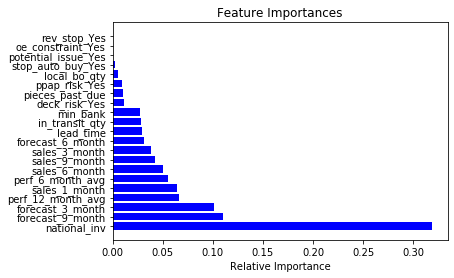

In [27]:
#Ploting the Feature importances
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [28]:
#Predicting on Train and Test
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [29]:
train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [30]:
test_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [31]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

[[34832    15]
 [   80  8000]]
[[10778   796]
 [  628  2107]]


In [32]:
#Calculate Accuracy, True Positive Rate and True Negative Rates
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)


Train TNR:  0.9995695468763451
Train TPR:  0.9900990099009901
Train Accuracy:  0.9977869406201225


In [33]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9312251598410229
Test TPR:  0.7703839122486289
Test Accuracy:  0.9004822139911943


In [34]:
#Building Decision Tree Model using Variable Importance

clf = tree.DecisionTreeClassifier(max_depth=9)
clf = clf.fit(X_train, y_train)

#Predicting on Train and Test
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

#Getting evaluation metrics and evaluating model performance
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

#Calculate Accuracy, True Positive Rate and True Negative Rates
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)


[[33192  1655]
 [ 1820  6260]]
[[10911   663]
 [  742  1993]]
Train TNR:  0.9525066720234167
Train TPR:  0.7747524752475248
Train Accuracy:  0.9190486174202717
Test TNR:  0.9427164333851736
Test TPR:  0.7287020109689214
Test Accuracy:  0.9018100496191208


In [35]:
#set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

In [36]:
#Use the GridSearchCV
dt = tree.DecisionTreeClassifier()
clf2 = GridSearchCV(dt, param_grid, cv=3)
clf2.fit(X_train, y_train)
clf2.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
#Predicting on Train and Test
train_pred = clf2.predict(X_train)
test_pred = clf2.predict(X_test)

In [38]:
#Getting evaluation metrics and evaluating model performance
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Train TNR:  0.9627514563664017
Train TPR:  0.780569306930693
Train Accuracy:  0.9284599436252242
Test TNR:  0.9474684637981683
Test TPR:  0.7082266910420475
Test Accuracy:  0.9017401635334404
